# Climate coding challenge, Part 6

Getting your own data

## There are more Earth Observation data online than any one person could ever look at

[NASA’s Earth Observing System Data and Information System (EOSDIS)
alone manages over 9PB of
data](https://www.earthdata.nasa.gov/learn/articles/getting-petabytes-people-how-eosdis-facilitates-earth-observing-data-discovery-and-use).
1 PB is roughly 100 times the entire Library of Congress (a good
approximation of all the books available in the US). It’s all available
to **you** once you learn how to download what you want.

Here we’re using the NOAA National Centers for Environmental Information
(NCEI) [Access Data
Service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation)
application progamming interface (API) to request data from their web
servers. We will be using data collected as part of the Global
Historical Climatology Network daily (GHCNd) from their [Climate Data
Online library](https://www.ncdc.noaa.gov/cdo-web/datasets) program at
NOAA.

For this example we’re requesting [daily summary data in
**Boulder, CO** (station ID
**USC00050848**)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00050848/detail).

> ** Your task:**
>
> 1.  Research the [**Global Historical Climatology Network -
>     Daily**](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html)
>     data source.
> 2.  In the cell below, write a 2-3 sentence description of the data
>     source.
> 3.  Include a citation of the data (**HINT:** See the ‘Data Citation’
>     tab on the GHCNd overview page).
>
> Your description should include:
>
> -   who takes the data
> -   where the data were taken
> -   what the maximum temperature units are
> -   how the data are collected

### Global Historical Climatology Network - Daily (GHCN-Daily), Version 3

The Global Historical Climatology Network - Daily (GHCN-Daily/GHCNd) 
dataset compiles daily climate observations from approximately 30 
different data sources. These observations are collected by various 
entities or organizations responsible for maintaining weather stations 
around the world. The data are gathered from over 90,000 land-based 
stations globally.

The maximum temperature units in the dataset are typically recorded in 
degrees Celsius or Fahrenheit, depending on the source of the data.

Data collection involves the daily recording of meteorological elements 
such as daily maximum and minimum temperatures, temperature at the time 
of observation, precipitation, snowfall, and snow depth. These measurements 
are usually taken at specific times each day by automated weather stations 
and manually by trained observers at various weather stations worldwide. 
The data are then compiled and processed to create a comprehensive dataset 
that captures daily climate observations from a wide range of locations.



	
Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, 
Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, 
Byron E.Gleason, and Tamara G. Houston (2012): Global Historical 
Climatology Network - Daily (GHCN-Daily), Version 3. Boulder, CO station
USC00050848 Observed Temperature Data. NOAA National Climatic Data Center. 
doi:10.7289/V5D21VHZ.Accessed: Novembre 29, 2024.

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and 
Tamara G. Houston, 2012: An Overview of the Global Historical Climatology 
Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. 
doi:10.1175/JTECH-D-11-00103.1.

## Access NCEI GHCNd Data from the internet using its API 🖥️ 📡 🖥️

The cell below contains the URL for the data you will use in this part
of the notebook. We created this URL by generating what is called an
**API endpoint** using the NCEI [API
documentation](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation).

> **Note**
>
> An **application programming interface** (API) is a way for two or
> more computer programs or components to communicate with each other.
> It is a type of software interface, offering a service to other pieces
> of software ([Wikipedia](https://en.wikipedia.org/wiki/API)).

First things first – you will need to import the `pandas` library to
access NCEI data through its URL:

In [1]:
# Import required packages
import pandas as pd

> **Your task:**
>
> 1.  Pick an expressive variable name for the URL.
> 2.  Reformat the URL so that it adheres to the [79-character PEP-8
>     line
>     limit](https://peps.python.org/pep-0008/#maximum-line-length). You
>     should see two vertical lines in each cell - don’t let your code
>     go past the second line.
> 3.  At the end of the cell where you define your url variable, **call
>     your variable (type out its name)** so it can be tested.

In [8]:
anchorage_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMAX'
    '&stations=USR0000ARAB'
    '&units=standard'
    '&startDate=1996-01-01'
    '&endDate=2024-11-30')
anchorage_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMAX&stations=USR0000ARAB&units=standard&startDate=1996-01-01&endDate=2024-11-30'

------------------------------------------------------------------------

## **Download and get started working with NCEI data**

Just like you did with the practice data, go ahead and use pandas to
import data from your API URL into Python. If you didn’t do it already,
you should import the pandas library **at the top of this notebook** so
that others who want to use your code can find it easily.

In [9]:
# Import data into Python from NCEI API
anchorage_climate_df = pd.read_csv(
    anchorage_url,
    index_col='DATE',
    parse_dates=True)

<Axes: xlabel='DATE'>

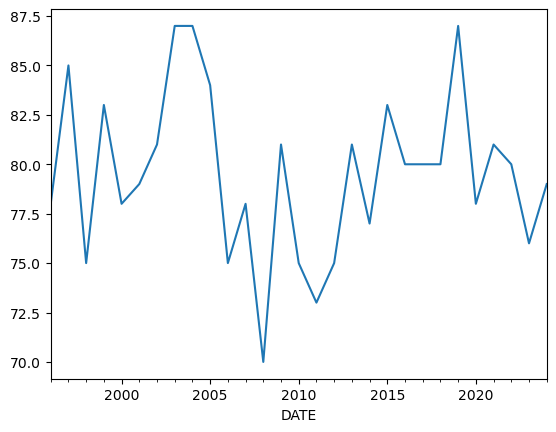

In [12]:
anchorage_climate_df.TMAX.resample('YS').max().plot()